In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler

!pip install colorama
from colorama import Fore

import warnings                                                                   # Removing all those annoying Warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
rawdata = pd.read_csv(url, names=names)

In [3]:
rawdata.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
rawdata.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
X=rawdata.drop('class', axis=1)
y=rawdata['class']

scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

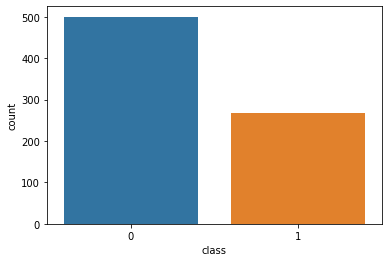

In [7]:
sns.countplot(y)       

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,
                                                 random_state=0) 

In [21]:
from io import BufferedIOBase
'''
Coding Perceptron Model from Scratch
'''

class Simple_Perceptron:                                                         # Naming the class as simple perceptron

  def __init__(self, learning_rate=0.1, epochs=100, weights=None, bias=None, thresh=0):              # Initializing the class using constructor
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = weights                                                       # If Pre- trained weights are not provided we will create a zero matrix 
    self.bias =bias     
    self.thresh=thresh                                                           # will start with bias as 0 if not provided
  

  def fit(self, X_train, y_train, return_bias_and_weight= False):
    
    if self.weights is not None :
      pass
    else :
      self.weights= np.zeros(X_train.shape[1])                                   # this is give out a zero matrix of shape 1 X columns in X_train
   
    if self.bias is not None:
      pass
    else:
      self.bias=0

    loss_list=[]
    for epoch in range(self.epochs):                                             # our model will be trained till the number of epoch we have set is reached
      local_loss=[]
      for i in range(X_train.shape[0]):
        
 
        y_pred= self.threshold(np.dot(self.weights, X_train[i]) + self.bias)     # y_pred is qual to dot product on X_train and weights plus bais

        self.weights =self.weights +self.learning_rate*(y_train[i] - y_pred)* X_train[i]    # X_train is a vector which would transform scaler into vectors thus facilitates in addition 

        self.bias = self.bias + self.learning_rate* (y_train[i] - y_pred)   
        local_loss.append(np.max([0.0, 1 - y_pred*y_train[i]]))
        # loss_list.append(np.max([0.0, 1 - y_pred*y_train[i]]))
      loss_list.append(np.mean((local_loss)))
    print(Fore.RED +f'Model has been Trained {Fore.BLUE} \n\nWeights : {self.weights} {Fore.GREEN} \n\nBias : {self.bias}')

    if return_bias_and_weight:
      return self.bias, self.weights, loss_list

  def threshold(self, val):                                                      # activation function is needed to add threshold
    if val >=self.thresh:
    
      return 1

    else:
      return 0

  def predict(self, X_test):

    y_pred=[]
    y_pred2=[]
    for i in range(X_test.shape[0]):
      y_pred.append(self.threshold(np.dot(self.weights, X_test[i])+ self.bias))
      y_pred2.append(np.dot(self.weights, X_test[i])+ self.bias)
    print(np.mean(np.array(y_pred2)))
    return np.array(y_pred)
      

----------------------------------------------------------------------------------------------------
Model has been Trained  

Weights : [ 0.11176471  0.50753769  0.0147541   0.02828283 -0.15496454  0.40342772
  0.3589667   0.02666667]  

Bias : -0.7
-0.11031136510461294
-0.10593976729717304
Accuracy of model at threshold 0 is 0.7987012987012987


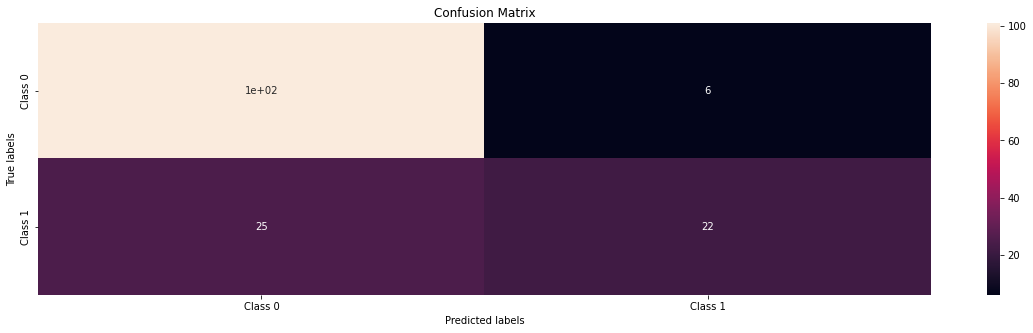

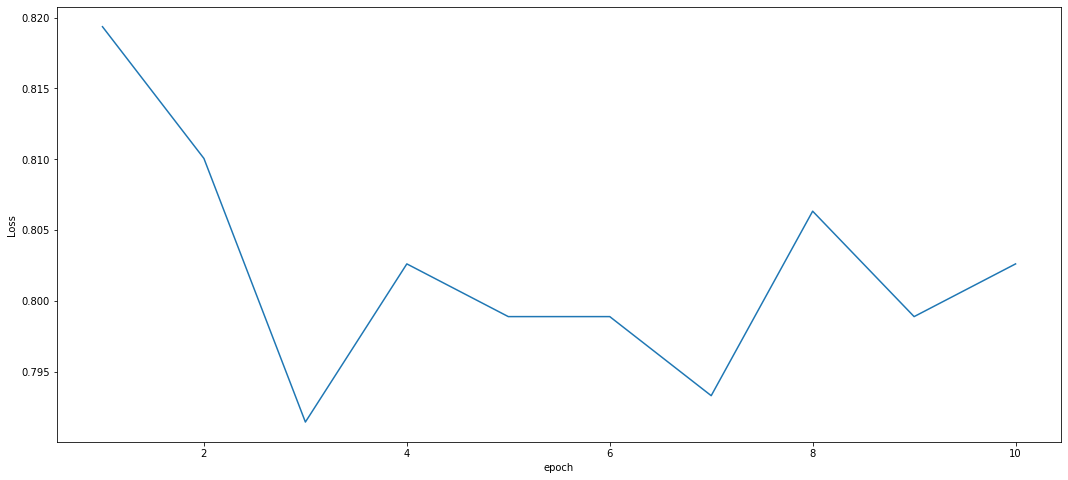

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       107
           1       0.79      0.47      0.59        47

    accuracy                           0.80       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.80      0.78       154

----------------------------------------------------------------------------------------------------
Model has been Trained  

Weights : [ 0.15294118  0.50603015 -0.08770492  0.01212121 -0.21347518  0.35454545
  0.34052092  0.025     ]  

Bias : -0.6
-0.09425877041888882
-0.09228466971966541
Accuracy of model at threshold 0.05 is 0.7662337662337663


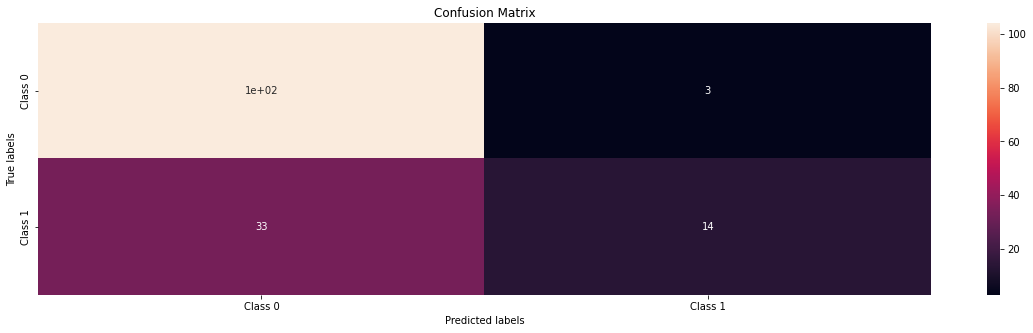

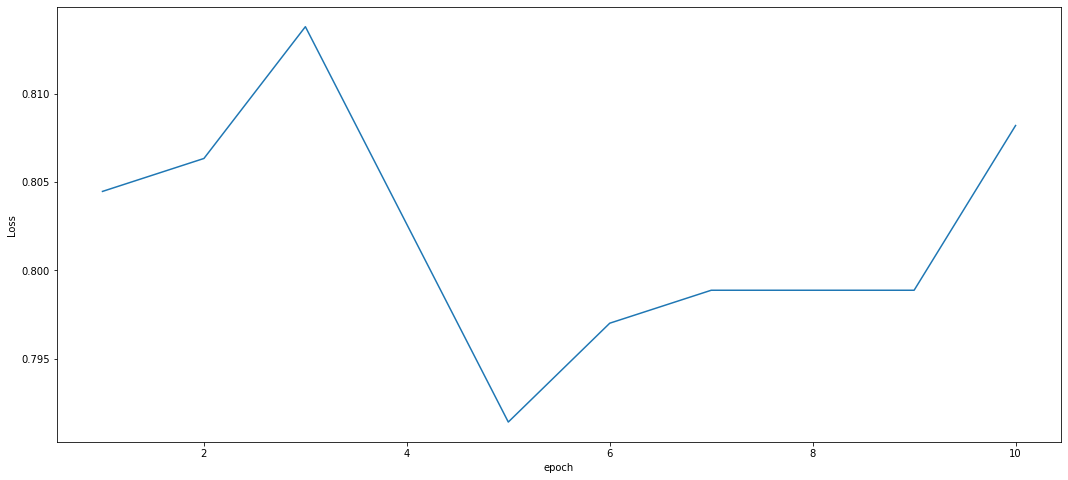

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       107
           1       0.82      0.30      0.44        47

    accuracy                           0.77       154
   macro avg       0.79      0.63      0.64       154
weighted avg       0.78      0.77      0.73       154



In [22]:
threshold_list=[0,0.05]
for i in threshold_list:
  print('-'*100)
  model =Simple_Perceptron(learning_rate=0.1, epochs=10, thresh=i)
  bias,weights,loss_list=model.fit(X_train, y_train.values, True)
  y_pred =model.predict(X_test)
  y_pred_train=model.predict(X_train)
  print(f'Accuracy of model at threshold {i} is {accuracy_score(y_test,y_pred)}')

  labels = ['Class 0', 'Class 1']
  cm_test = confusion_matrix(y_test, y_pred)
  fig, ax= plt.subplots(figsize=(20,5))
  sns.heatmap(cm_test, annot=True, ax = ax) 
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

  print('\n\n')
  plt.figure(figsize=(18,8))
  df= pd.DataFrame()
  df['epoch']=range(1,len(loss_list)+1)
  df['Loss']=loss_list
  sns.lineplot(data=df, y='Loss', x='epoch')
  plt.show()

  print(classification_report(y_test, y_pred))

In [23]:
'''
Creating Validation Set, to avoid overfitting 
'''
X_train2,X_val,y_train2,y_val = train_test_split(X,y, test_size =0.3,
                                                 random_state=0)     

In [24]:
updated_df= pd.DataFrame(X_train)
updated_df['Class']=y_pred_train

In [25]:
updated_df.head()

,0,1,2,3,4,5,6,7,Class
0,0.000000,0.758794,0.737705,0.464646,0.0,0.627422,0.125107,0.000000,0
1,0.058824,0.417085,0.557377,0.000000,0.0,0.271237,0.233134,0.100000,0
2,0.117647,0.613065,0.573770,0.272727,0.0,0.548435,0.111870,0.100000,0
3,0.235294,0.733668,0.639344,0.000000,0.0,0.573770,0.188728,0.766667,0
4,0.000000,0.618090,0.590164,0.000000,0.0,0.540984,0.076857,0.516667,0


In [26]:
updated_df['Class'].value_counts()

0    471
1     66
Name: Class, dtype: int64

In [27]:
df_class_1= updated_df[updated_df['Class']==1]                                  # Only values as 1
df_class_0= updated_df[updated_df['Class']==0]  

In [28]:
X_class_1= np.array(df_class_1.drop('Class', axis=1) )
y_class_1= np.array(df_class_1['Class'])

X_class_0= np.array(df_class_0.drop('Class', axis=1))
y_class_0= np.array(df_class_0['Class'])

Model has been Trained  

Weights : [ 0.15294118  0.50603015 -0.08770492  0.01212121 -0.21347518  0.35454545
  0.34052092  0.025     ]  

Bias : -0.6
-0.09758192577156452
Accuracy of model at threshold 0.05 is 0.7792207792207793


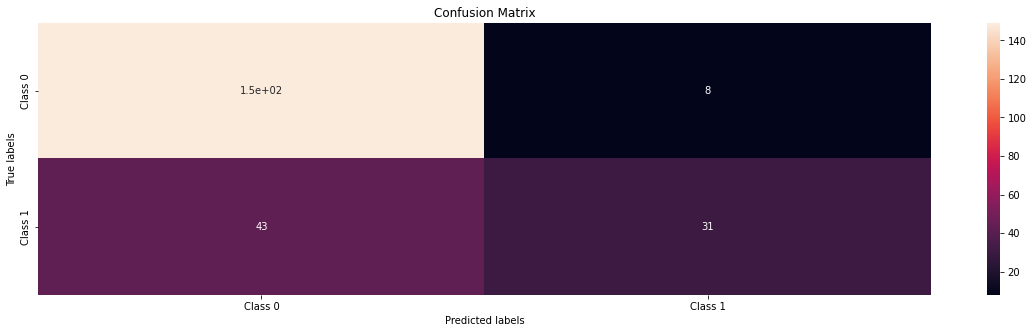




              precision    recall  f1-score   support

           0       0.78      0.95      0.85       157
           1       0.79      0.42      0.55        74

    accuracy                           0.78       231
   macro avg       0.79      0.68      0.70       231
weighted avg       0.78      0.78      0.76       231



In [33]:
model =Simple_Perceptron(learning_rate=0.1, epochs=4, thresh=0, weights=weights, bias=bias)
final_bias,final_weights,loss_list= model.fit(X_class_1, y_class_1, True)

y_pred =model.predict(X_val)

print(f'Accuracy of model at threshold {i} is {accuracy_score(y_val,y_pred)}')

labels = ['Class 0', 'Class 1']
cm_test = confusion_matrix(y_val, y_pred)
fig, ax= plt.subplots(figsize=(20,5))
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print('\n\n')

print(classification_report(y_val, y_pred))

Model has been Trained  

Weights : [ 0.15294118  0.43015075 -0.16147541 -0.03434343 -0.21347518  0.29180328
  0.32801025  0.025     ]  

Bias : -0.7
-0.32465487136149296
Accuracy of model at threshold 0.05 is 0.6926406926406926


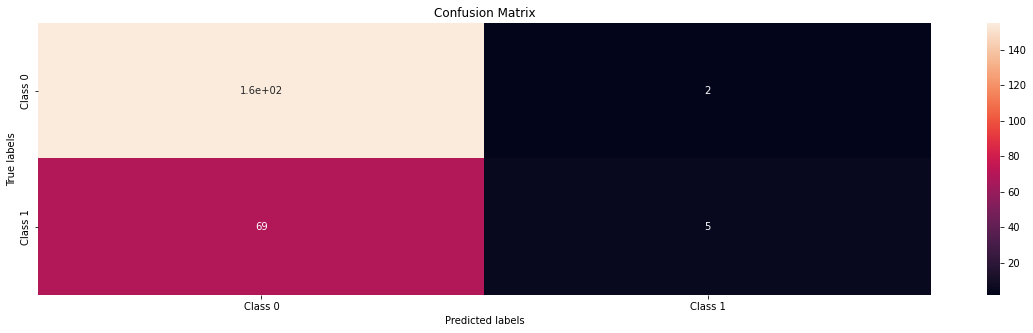




              precision    recall  f1-score   support

           0       0.69      0.99      0.81       157
           1       0.71      0.07      0.12        74

    accuracy                           0.69       231
   macro avg       0.70      0.53      0.47       231
weighted avg       0.70      0.69      0.59       231



In [41]:
model =Simple_Perceptron(learning_rate=1e-1, epochs=5, thresh=-0.1, weights=final_weights, bias=final_bias)
bias_2,weights_2,loss_list= model.fit(X_class_0, y_class_0, True)
y_pred =model.predict(X_val)

print(f'Accuracy of model at threshold {i} is {accuracy_score(y_val,y_pred)}')

labels = ['Class 0', 'Class 1']
cm_test = confusion_matrix(y_val, y_pred)
fig, ax= plt.subplots(figsize=(20,5))
sns.heatmap(cm_test, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print('\n\n')

print(classification_report(y_val, y_pred))